# Load and transform TwoPattern dataset
http://timeseriesclassification.com/description.php?Dataset=TwoPatterns

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from time import time
from tqdm import tqdm

time_index = int(time())

DATA_DIR = "data_two_pattern"
DIFFERENT_LENS = True
UNBALANCED = False # if set to unbalanced, samples are shuffled so that data is unbalanced 

infix = "dif" if DIFFERENT_LENS else "eq"
OUTPUT_FILENAME = f"two_pattern_{infix}_lens.pkl"
NO_TEST_SAMPLES = 4000 # there are total 5000 samples

## Prepare and save dataset

In [2]:
converted_lines = []
for filename in ["test.txt", "train.txt"]:
    with open (f"{DATA_DIR}/{filename}", "r") as f:
        lines = f.readlines()
        for l in lines:
            floats = list(map(float, l.split()))
            converted_lines.append(floats)

sample_ids = list(range(len(converted_lines)))
true_labels = [int(X[0])-1 for X in converted_lines] # labels should start from 0
all_X_samples = [np.array(X[1:]).reshape(-1,1) for X in converted_lines]

# if different lenghts, cut some of samples
if DIFFERENT_LENS:
    new_samples = []
    for X in all_X_samples:
        cut = np.random.randint(1,40)
        new = X[:-cut]
        new_samples.append(new)
        if len(new) == 0:
            raise Exception
    all_X_samples = new_samples # overwrite sample list

sample_lengths = [sample.shape[0] for sample in all_X_samples]

labels_df = pd.DataFrame({
    "sample_id": sample_ids,
    "true_label": true_labels,
    "sample_len": sample_lengths
})

In [3]:
test_ids = []
train_ids = []

if not UNBALANCED:
    for label, df in labels_df.groupby("true_label"):
        pass
    
indices_splits_lst = [{"test_samples_ids": test_ids, "train_samples_ids": train_ids}]

In [4]:
output_path = f"{DATA_DIR}/{OUTPUT_FILENAME}"

metadata = {
    "N_TRAIN_SAMPLES_PER_MODEL": len(train_ids),
    "N_TEST_SAMPLES_PER_MODEL": len(test_ids),
    "MAX_SAMPLE_LEN": max(sample_lengths),
    "MIN_SAMPLE_LEN": min(sample_lengths)
}

data = {
    'generating_model': "SIM_TwoPat",
    'data_filename': output_path,
    'time_index': time_index,
    'models_lst': None,
    'labels_df': labels_df,
    'all_X_samples': all_X_samples,
    'indices_splits_lst': indices_splits_lst,
    'metadata': metadata,
    'description': "http://timeseriesclassification.com/description.php?Dataset=TwoPatterns"
}

with open(output_path, 'wb') as f:
    pickle.dump(data, f)
    print(f"Data saved to {output_path}.")

Data saved to data_two_pattern/two_pattern_dif_lens.pkl.


## EDA

### Is dataset balanced?

In [5]:
# test
labels_df.set_index("sample_id").iloc[test_ids].groupby("true_label").count()

,sample_len
true_label,
0,1035
1,1011
2,995
3,959


In [6]:
labels_df.set_index("sample_id").iloc[train_ids].groupby("true_label").count()

,sample_len
true_label,
0,271
1,237
2,250
3,242


Sizes of all classes are roughly equal both in train and test subsets.

### Plots of samples

Preparing plots:   0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_12418/2180241337.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array([all_X_samples[id] for id in ids])
Preparing plots:   0%|          | 0/4 [00:00<?, ?it/s]


ValueError: setting an array element with a sequence.

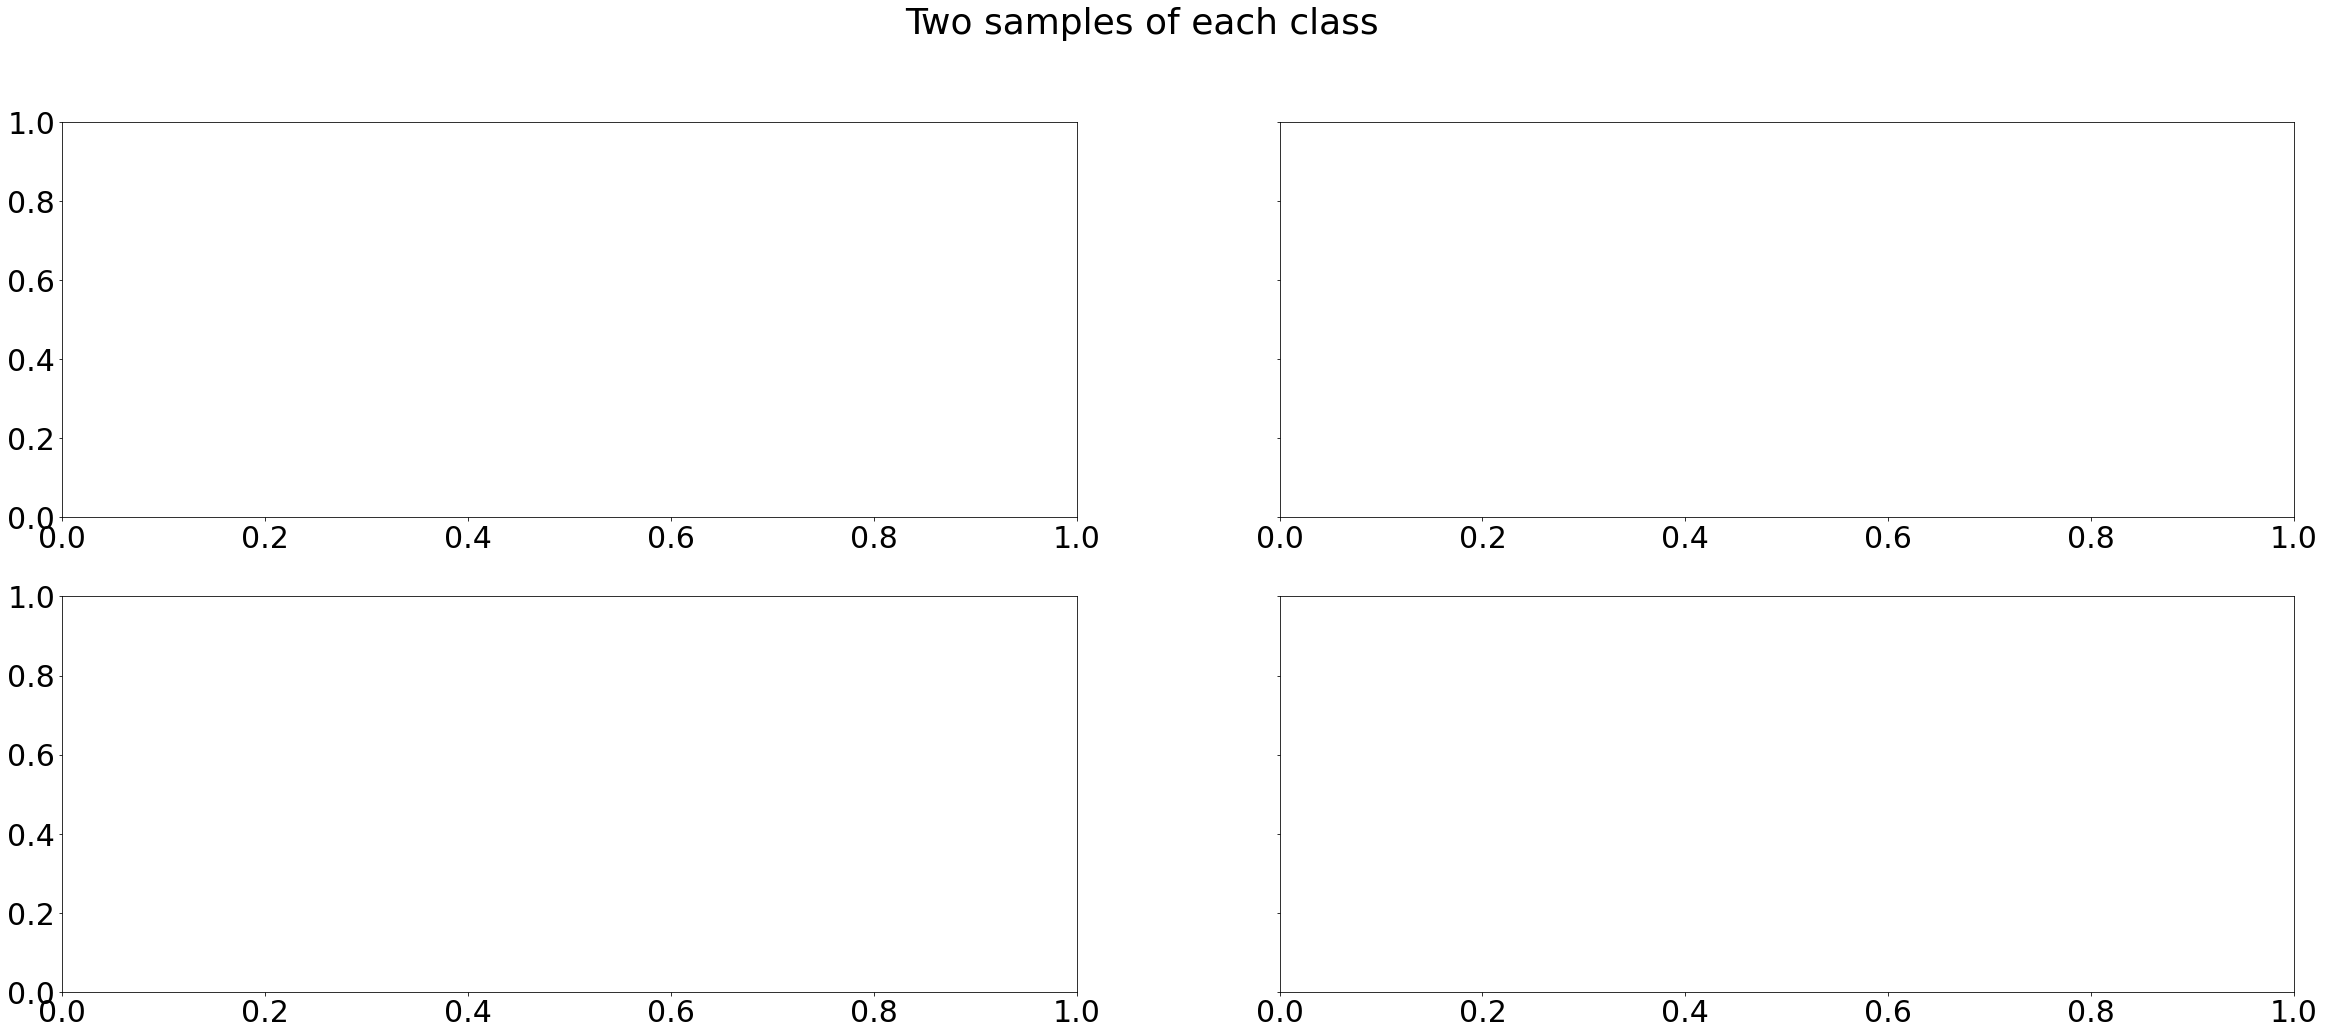

In [7]:
labels = ["DD", "UD", "DU", "UU"]
plt.rcParams["figure.figsize"] = (40, 16)
plt.rcParams['font.size'] = 30
fig, axes = plt.subplots(2,2, sharey="all")
plt.suptitle(f"Two samples of each class")
for i, df in tqdm(labels_df.groupby("true_label"), desc = "Preparing plots"):
    ax = axes.flat[i]
    ids = df["sample_id"].sample(2).values
    samples = np.array([all_X_samples[id] for id in ids])
    ax.plot(samples.reshape((2, -1)).T, lw = 3)
    ax.set_title(f"({labels[i]}) label = {i}")
    ax.grid()
    
plt.savefig(f"./plots/models_twoPat_{time_index}.jpg")
plt.show()